# Titanic DataSet Kaggle Challenge

## Step 1: Geschäftsverständnis

(engl. Business Understanding) In der Phase des Geschäftsverständnisses geht es darum, die konkreten Ziele und Anforderungen für das Data Mining festzulegen. Ergebnis dieser Phase ist die Formulierung der Aufgabenstellung und die Beschreibung der geplanten groben Vorgehensweise. [1]

<img src="visuals/titanic_sketch.png">

https://de.wikipedia.org/wiki/RMS_Titanic

### Aufgabe:  "Vorhersage" ob eine Passagier_In den Untergang der Titanic überlebt hat

## Step 2: Datenverständnis 

(engl. Data Understanding) Im Rahmen des Datenverständnisses wird versucht, sich einen ersten Überblick über die zur Verfügung stehenden Daten und deren Qualität zu verschaffen. Es erfolgt eine Analyse und Bewertung der Datenqualität. Probleme mit der Qualität der vorhandenen Daten in Bezug auf die in der vorherigen Phase festgelegten Aufgabenstellung sind zu benennen. [1]

### 2.1 Vorbereitung der Entwicklungsumgebung
Import der notwendigen Python Bibliotheken

In [84]:
import pandas as pd             # Pandas Bibliothek für Datenverarbeitung, siehe https://pandas.pydata.org/
import matplotlib.pyplot as plt # Matplotlib für die Datenvisualisierung, siehe https://matplotlib.org/
import seaborn as sns           # Seaborn für die Datenvisualisierung, siehe https://seaborn.pydata.org/
import numpy as np              # Numpy für effiziente Rechenoperationen, siehe https://numpy.org/
import os                       # OS für den Zugriff auf externe Daten, siehe https://docs.python.org/3/library/os.html
import random                   # Generieren von Pseudo-Zufallszahlen, siehe https://docs.python.org/3/library/random.html#module-random

# Sklearn ML-Algorithmen
from sklearn import tree, linear_model, neighbors, naive_bayes, ensemble, naive_bayes

# Sklearn Modellierungs-Helfer
from sklearn.preprocessing import LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.tree import export_graphviz

Formatierung der Mark-up Tabellen: linksbündige Ausrichtung

In [2]:
%%html
<style>
table {float:left}
</style>

In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="ticks")

### 2.2 Datenimport
Import und merge der CSV Daten <br>
Quelle: https://www.kaggle.com/c/titanic/data

In [85]:
# Trainingsdaten-Datei einlesen
df_train = pd.read_csv("data/train.csv")
df_train["Survived"] = df_train["Survived"].astype(int)

# Testdaten-Datei einlesen
df_test  = pd.read_csv("data/test.csv")

# beide Datensätze mergen, Trainingsdatensatz 0:892, Testdatensatz 892:1310
df = pd.concat([df_train, df_test], ignore_index = True)


### 2.3 Datenerkundung
Einen Überblick über die vorhandenen Daten verschaffen <br>
Quellen: https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy

#### Beschreibung der Daten

| Variable | Bedeutung | Beschreibung |
| :- | :- | :- |
| PassengerId | Passagier_In-Nummer | Zahl zwischen 1 und 1309 |
| Survived | Hat die Passagier_In den Untergang überlebt | 0 = Nein, 1 = Ja |
| Pclass | Ticket-Klasse | 1 = 1. Klasse, 2 = 2. Klasse, 3 = 3. Klasse
| Name | Name der Passagier_In | Nachname, Vorname |
| Sex | Geschlecht der Passagier_In | male = Mann, female = Frau |
| Age | Alter der Passagier_In |
| SibSp | Anzahl der Geschwister/ Ehepartner an Board |
| Parch | Anzahl der Kinder/ Eltern an Board |
| Ticket | Ticket-Nummer |
| Fare | Ticket-Preis |
| Cabin | Kabinennummer |
| Embarked | Einschiffungshafen | C = Cherbourg, Q = Queenstown, S = Southampton |

In [88]:
# Tabellarische Darstellung von 10 zufälligen Datensätze erzeugen
df.sample(10) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
89,90,0.0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.0500,NaN,S
1132,1133,NaN,2,"Christy, Mrs. (Alice Frances)",female,45.0,0,2,237789,30.0000,NaN,S
776,777,0.0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
496,497,1.0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
544,545,0.0,1,"Douglas, Mr. Walter Donald",male,50.0,1,0,PC 17761,106.4250,C86,C
468,469,0.0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,NaN,Q
1221,1222,NaN,2,"Davies, Mrs. John Morgan (Elizabeth Agnes Mary...",female,48.0,0,2,C.A. 33112,36.7500,NaN,S
1074,1075,NaN,3,"Lane, Mr. Patrick",male,NaN,0,0,7935,7.7500,NaN,Q
1016,1017,NaN,3,"Cribb, Miss. Laura Alice",female,17.0,0,1,371362,16.1000,NaN,S
158,159,0.0,3,"Smiljanic, Mr. Mile",male,NaN,0,0,315037,8.6625,NaN,S


In [89]:
# Beschreibung des gesamten Datensatzes: Fehlende Werte und Datentype
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [90]:
# Statistische Beschreibung der numerischen Features des Datensatzes
df.describe(include = np.number) 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [91]:
# Statistische Beschreibung der nicht numerischen Features des Datensatzes
df.describe(include = np.object) 

,Name,Sex,Ticket,Cabin,Embarked
count,1309,1309,1309,295,1307
unique,1307,2,929,186,3
top,"Kelly, Mr. James",male,CA. 2343,C23 C25 C27,S
freq,2,843,11,6,914


### 2.4 Visualisierung

Für die Visualisierung der Daten wird die Bibliothek Seaborn genutzt. </p>
Infos und Benutzungshinweise unter https://seaborn.pydata.org/index.html

# Fokus auf Infos aus dem Datensatz legen - nicht auf das Überleben

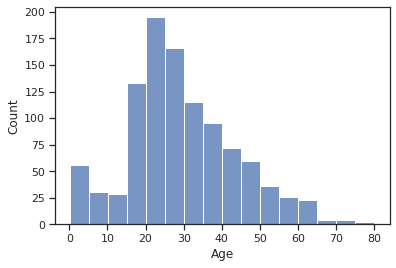

In [92]:
# Alter der Pasagier_Innen als Histogramm
sns.histplot(data = df, x = df["Age"], bins = 16, kde = False)
plt.show()

<AxesSubplot:xlabel='Fare', ylabel='Count'>

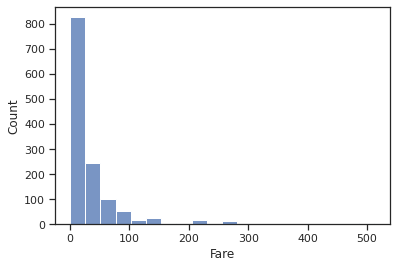

In [93]:
# Alter der Pasagier_Innen
sns.histplot(data = df, x = df["Fare"], bins = 20, kde = False)

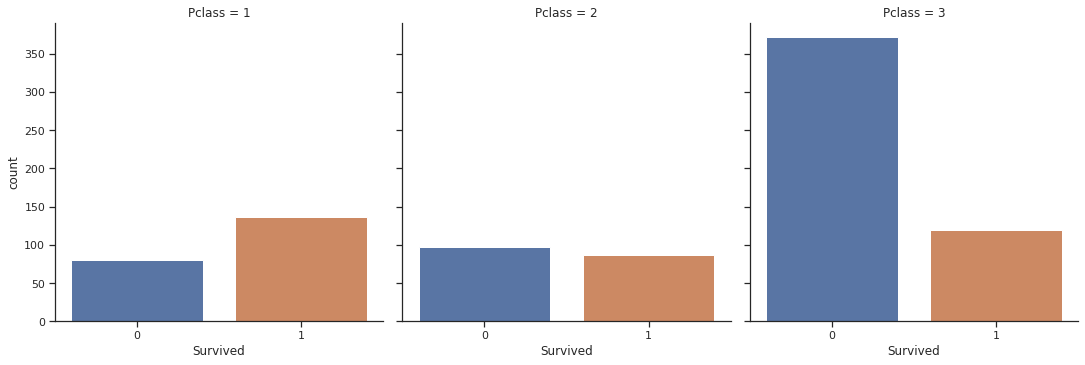

In [94]:
sns.catplot(x = "Survived", 
            col = "Pclass", 
            col_wrap = 3, 
            data = df_train,
            kind="count")

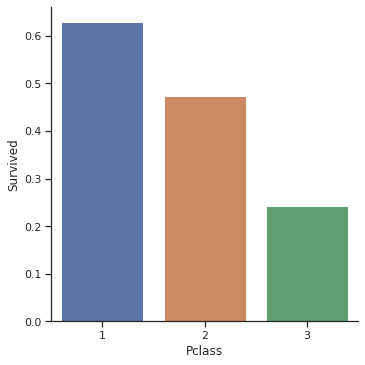

In [95]:
# Verteilung der Klassen
sns.catplot(x = "Pclass", 
            y = "Survived", 
            kind = "bar", 
            data = df_train, 
            ci=None)

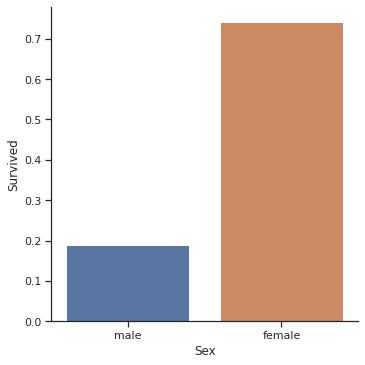

In [96]:
# Alter der Pasagier_Innen vs Überleben
sns.catplot(x = "Sex", 
            y = "Survived", 
            kind = "bar", 
            data = df_train,
            ci=None)

<AxesSubplot:xlabel='Age', ylabel='Count'>

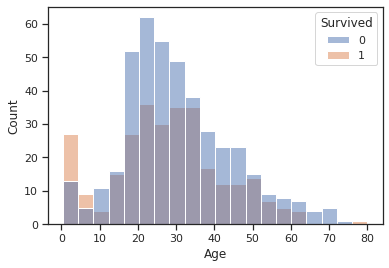

In [97]:
# Alter vs Überleben
sns.histplot(x = "Age", 
             hue = "Survived", 
             data = df_train)

<AxesSubplot:xlabel='Sex', ylabel='Count'>

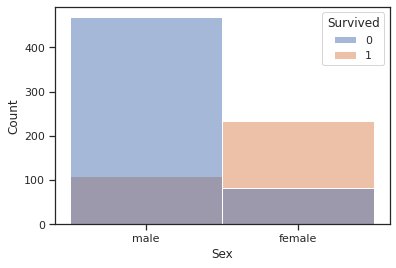

In [98]:
# Geschlecht vs Überleben
sns.histplot(x = "Sex", 
             hue = "Survived", 
             data = df_train)

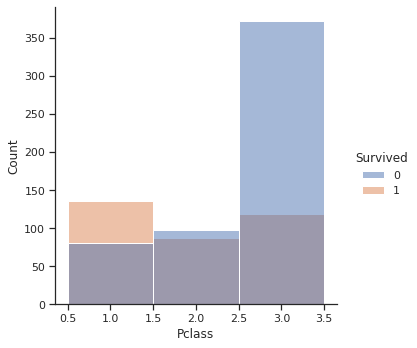

In [99]:
# Klasse vs Überleben
sns.displot(x = "Pclass", hue = "Survived", data = df_train, discrete = True)

### 2.5 Erkenntnisse

#### Beschreibung der Daten

| Variable | Bedeutung | Beschreibung |Formatierung fehlerhaft | Formatierung soll | Fehlende Werte |
| :--- | :--- | :--- | :--- | :--- | :--- |
| PassengerId | Passagier_In-Nummer | Zahl zwischen 1 und 1309 | ja | Integer | nein |
| Survived | Hat die Passagier_In den Untergang überlebt | 0 = Nein, 1 = Ja | nein | | nein |
| Pclass | Ticket-Klasse | 1 = 1. Klasse, 2 = 2. Klasse, 3 = 3. Klasse ja | Integer | | ja |
| Name | Name der Passagier_In | Nachname, Vorname | nein | | nein | 
| Sex | Geschlecht der Passagier_In | male = Mann, female = Frau | nein | | ja |
| Age | Alter der Passagier_In | | ja | Integer | ja |
| SibSp | Anzahl der Geschwister/ Ehepartner an Board | | nein | | nein |
| Parch | Anzahl der Kinder/ Eltern an Board | | nein | | nein |
| Ticket | Ticket-Nummer | |  nein | | nein |
| Fare | Ticket-Preis | |  nein | | ja |
| Cabin | Kabinennummer | |  nein | | ja |
| Embarked | Einschiffungshafen | C = Cherbourg, Q = Queenstown, S = Southampton |  nein | | ja |

## Step 3: Datenvorbereitung
(engl. Data Preparation) Die Datenvorbereitung dient dazu, einen finalen Datensatz zu erstellen, der die Basis für die nächste Phase der Modellierung bildet. [1]

### 3.1 Auffüllen der fehlenden Werte 

In [100]:
df["Age"]      = df['Age'].fillna(df['Age'].median())            # Alter mit dem Median auffüllen
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) # Einschiffhafen mit dem Modus auffüllen
df['Fare']     = df['Fare'].fillna(df['Fare'].median())          # Ticket-Preis mit dem Median auffüllen

### 3.2 Umwandlung der Eingangsdaten

In [102]:
df["Age"] = df["Age"].astype("int") # Alter in Integer umwandeln

In [103]:
# Überprüfung der Umwandlung
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   int64  
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1309 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 122.8+ KB


### 3.3 Datenexploration und Feature Engineering

Könnte das Geschlecht einen Einfluss auf das Überleben haben?

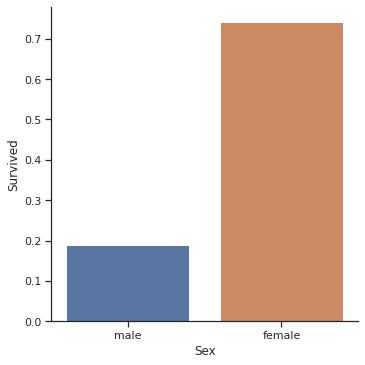

In [104]:
# Geschlecht  vs. Überlebensanteil

sns.catplot(x = "Sex", 
            y = "Survived", 
            kind = "bar", 
            data = df_train,
            ci = None)

Könnte die Ticket-Klasse einen Einfluss auf das Überleben haben?

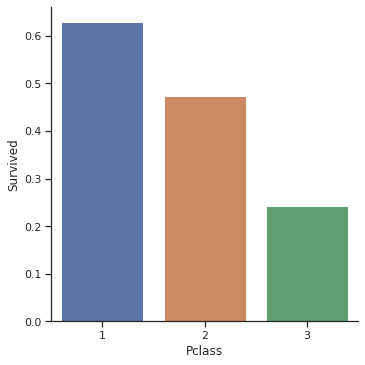

In [105]:
# Ticket-Klasse vs. Überlebensanteil

sns.catplot(x = "Pclass", 
            y = "Survived", 
            kind = "bar", 
            data = df_train,
            ci = None)

Könnte das Alter einen Einfluss auf das Überleben haben?

<AxesSubplot:xlabel='Age', ylabel='Count'>

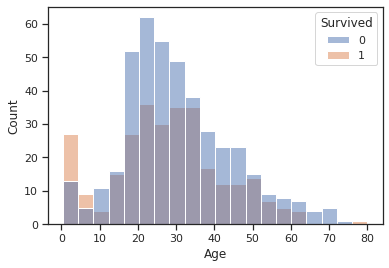

In [106]:
# Alter der Pasagier_Innen vs. Überleben
sns.histplot(x = "Age", 
             hue = "Survived", 
             data = df_train)

In [107]:
# Altersgruppe anlegen
df['AgeBin'] = pd.cut(df['Age'].astype(int), 6)

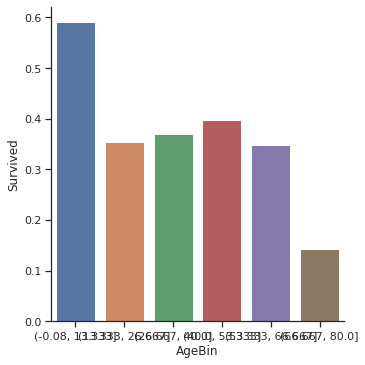

In [108]:
# Altergruppe  vs. Überlebensanteil
sns.catplot(x = "AgeBin", 
            y = "Survived", 
            kind = "bar", 
            data = df,
            ci = None)

Könnte der Ticketpreis einen Einflüss auf das Überleben haben?

<AxesSubplot:xlabel='Fare', ylabel='Count'>

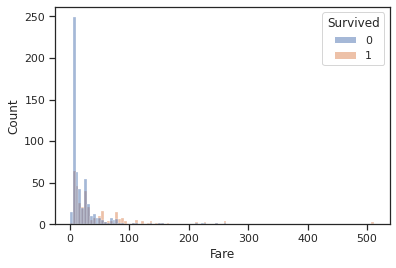

In [109]:
# Ticketpreis der Pasagier_Innen
sns.histplot(x = "Fare", 
             hue = "Survived", 
             data = df_train)

In [110]:
# Ticketkathegorie anlegen
df['FareBin'] = pd.qcut(df['Fare'], 6)

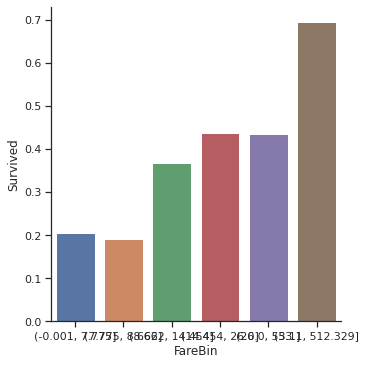

In [111]:
# FareBin vs Überlebensanteil
sns.catplot(x = "FareBin", 
            y = "Survived", 
            kind = "bar", 
            data = df,
            ci = None)

Könnte es einen Einfluss auf das Überleben haben, wenn man alleine reist?

In [112]:
# Einzelreisende anlegen
df['IsAlone']    = 0
df['IsAlone'].loc[df['SibSp']+df['Parch'] == 0] = 1

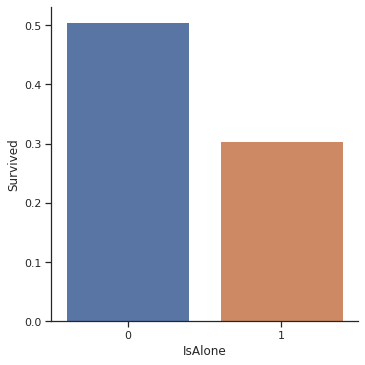

In [113]:
# Einzelreisende vs Überlebensanteil
sns.catplot(x = "IsAlone", 
            y = "Survived", 
            kind = "bar", 
            data = df,
            ci = None)

Könnte die Familiengröße einen Einfluss auf das Überleben haben?

In [114]:
# Familiengröße
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

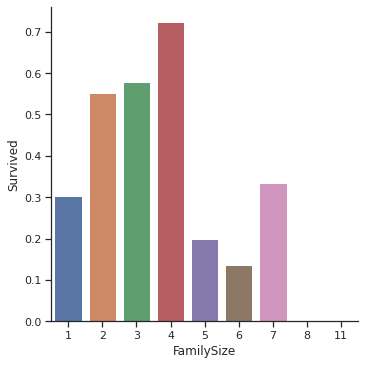

In [115]:
# Familiengröße vs Überlebensanteil
sns.catplot(x = "FamilySize", 
            y = "Survived", 
            kind = "bar", 
            data = df,
            ci = None)

Könnte es einen Einfluss auf das Überleben haben, wenn man über eine Kabine verfügt?

In [116]:
# Kabineninhaber_In anlegen
df['CabinOwn']   = 1
df['CabinOwn']   = df['CabinOwn'] - df['Cabin'].isna().astype("int")

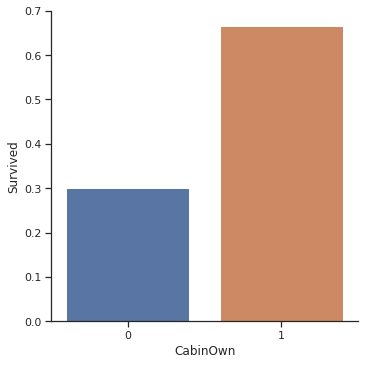

In [117]:
# Einzelreisende vs Überlebensanteil
sns.catplot(x = "CabinOwn", 
            y = "Survived", 
            kind = "bar", 
            data = df,
            ci = None)

### 2.4 Überflüssige Features löschen

In [118]:
# Löschen der Spalten Name, Cabin und Ticket
df = df.drop(["Name", "Cabin", "Ticket"],axis = 1)

### 2.5 Encoding der Features

In [119]:
label               = LabelEncoder()                      # Encoder Objekt anlegen
df['Sex_Code']      = label.fit_transform(df['Sex'])      # Encodiertes Geschlecht
df['Embarked_Code'] = label.fit_transform(df['Embarked']) # Encodierter Einschiffhafen
df['AgeBin_Code']   = label.fit_transform(df['AgeBin'])   # Encodiertes Alter
df['FareBin_Code']  = label.fit_transform(df['FareBin'])  # Encodierter Ticketpreis

## Step 4: Modellierung
(engl. Modeling) <br> 
Im Rahmen der Modellierung werden die für die Aufgabenstellung geeigneten Methoden des Data Minings auf den in der Datenvorbereitung erstellten Datensatz angewandt. <br> 
Typisch für diese Phase sind die Optimierung der Parameter und die Erstellung mehrerer Modelle.

### 4.1 Modellierungsverfahren auswählen

Logistische Regression </p>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

K-Nächste-Nachbarn </p>
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Entscheidungsbaum </p>
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier


### 4.2 Testdesign

Es soll "vorhergesagt" werden, ob eine Passagier_In das Titanic Unglück überlebt hat.
Die Modelle können genau zwei Werte ausgeben - Überlebt Ja/ Nein.
Eine "gutes" Modell sollte einen möglichst großen Anteil korrekt prognostizieren, somit kann die Güte des Modells anhand des Anteils korrekt vorhergesagter Überlebenswerte bewertet werden.

Für die Bewertung der Modelle soll die Metrik "Accuracy" herangezogen werden. </p>
https://scikit-learn.org/stable/modules/model_evaluation.html#accuracy-score

\begin{equation*}
\texttt{accuracy}(y, \hat{y}) = \frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples}-1} 1(\hat{y}_i = y_i)
\end{equation*}

### 4.3 Aufteilung der Datensätze in Trainings- und Testdaten

In [120]:
# Zufallswert für die Aufteilung der Datensätze festlegen
random_value = random.randrange(100) 

In [121]:
# Fester Trainingsdatensatz für das Training der ML-Modelle anlegen
df_train = df[0:891]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    891 non-null    int64   
 1   Survived       891 non-null    float64 
 2   Pclass         891 non-null    int64   
 3   Sex            891 non-null    object  
 4   Age            891 non-null    int64   
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   AgeBin         891 non-null    category
 10  FareBin        891 non-null    category
 11  IsAlone        891 non-null    int64   
 12  FamilySize     891 non-null    int64   
 13  CabinOwn       891 non-null    int64   
 14  Sex_Code       891 non-null    int64   
 15  Embarked_Code  891 non-null    int64   
 16  AgeBin_Code    891 non-null    int64   
 17  FareBin_Code   891 non-null    int6

In [122]:
# Fester Testdatensatz für die spätere Bewertung der ML-Modelle anlegen
df_test  = df[891:]
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   PassengerId    418 non-null    int64   
 1   Survived       0 non-null      float64 
 2   Pclass         418 non-null    int64   
 3   Sex            418 non-null    object  
 4   Age            418 non-null    int64   
 5   SibSp          418 non-null    int64   
 6   Parch          418 non-null    int64   
 7   Fare           418 non-null    float64 
 8   Embarked       418 non-null    object  
 9   AgeBin         418 non-null    category
 10  FareBin        418 non-null    category
 11  IsAlone        418 non-null    int64   
 12  FamilySize     418 non-null    int64   
 13  CabinOwn       418 non-null    int64   
 14  Sex_Code       418 non-null    int64   
 15  Embarked_Code  418 non-null    int64   
 16  AgeBin_Code    418 non-null    int64   
 17  FareBin_Code   418 non-null    i

In [123]:
# Parameter für das Training festlegen
params = ["Pclass", "Age", "SibSp", "Parch", "Fare", 
          "FamilySize", "IsAlone", "CabinOwn", "Sex_Code", 
          "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [124]:
# Trainingsdatensatz in Trainings- und Validierungsdaten aufteilen
train_x, val_x, train_y, val_y = model_selection.train_test_split(df_train[params], 
                                                                  df_train["Survived"],
                                                                  random_state = random_value)

In [125]:
# Trainingsdatensatz ausgeben
train_x.head(5)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,IsAlone,CabinOwn,Sex_Code,Embarked_Code,AgeBin_Code,FareBin_Code
555,1,62,0,0,26.550,1,1,0,1,2,4,4
823,3,27,0,1,12.475,2,0,1,0,2,2,2
683,3,14,5,2,46.900,8,0,0,1,2,1,4
840,3,20,0,0,7.925,1,1,0,1,2,1,1
880,2,25,0,1,26.000,2,0,0,0,2,1,3


In [126]:
# Überlebenswerte des Trainingsdatensatz ausgeben
train_y.head(5)

555    0.0
823    1.0
683    0.0
840    0.0
880    1.0
Name: Survived, dtype: float64

### 4.2 Training eines einfachen Logistischen Regressions Models

In [127]:
# Parameter für das Modell festlegen
params_log = ["Fare"]

# Model initialisieren
log_reg = linear_model.LogisticRegression()

# Model trainieren
log_reg = log_reg.fit(train_x[params_log], train_y)

### 4.3 Bewertung des Logistischen Regressions Models anhand der Trainingsdaten

In [128]:
# Model für Prognose verwenden und Prognose ausgeben
log_reg_prediction = log_reg.predict(train_x[params_log])

In [129]:
# Ausgabe der prognostizierten Werte (erste 20 Werte)
print("Prognostizierte Werte")
print(log_reg_prediction[:20])

Prognostizierte Werte
[0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [130]:
# Wahre Werte ausgeben (erste 20 Werte)
train_y_np = train_y.to_numpy() # Pandas Serie in Numpy Array umwandeln
print("Wahre Werte")
print(train_y_np[:20])

Wahre Werte
[0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1.]


In [131]:
# Vergleich zwischen Prognose und wahren Werten ausgeben
difference_pred_true = log_reg_prediction - train_y_np
print("Vergleich Prognose vs. Wahre Werte")
print(difference_pred_true[:20])

Vergleich Prognose vs. Wahre Werte
[ 0. -1.  0.  0. -1.  1.  1.  0. -1.  0.  0. -1.  0.  0. -1.  0. -1.  0.
  0. -1.]


In [132]:
# Berechnen der Accuracy

# Nullen im Vergleichs Array zählen
count_zeros  = np.count_nonzero(log_reg_prediction - train_y.to_numpy() == 0. , axis=0) 

# Anzahl der Werte im Vergleichs Array zählen
count_values = len(log_reg_prediction - train_y.to_numpy())

# Anteil der korrekt vorhergesagten Werte zählen
score        = count_zeros / count_values

# Ergebnis ausgeben
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.674 %


In [133]:
# Berechnung der Accuracy mit einer Zeile mittels score-Methode
score = log_reg.score(train_x[params_log], train_y)

# Ergebnis ausgeben
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.674 %


### 4.4 Bewertung des Logistischen Regressions Models anhand der Validierungsdaten

In [134]:
# Berechnung der Accuracy mit einer Zeile mittels score-Methode
score = log_reg.score(val_x[params_log], val_y)

# Ergebnis ausgeben
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.632 %


### 4.5 Training eines Logistischen Regressions Models mit mehreren Inputs

In [135]:
# Parameter festlegen
params_log = ["CabinOwn", "Sex_Code", "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [136]:
# Model initialisieren und trainieren
log_reg = linear_model.LogisticRegression()
log_reg = log_reg.fit(train_x[params_log], train_y)

In [137]:
# Berechnung der Accuracy für die Trainingsdaten
score = log_reg.score(train_x[params_log], train_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.787 %


### 4.6 Bewertung eines Logistischen Regressions Models mit mehreren Inputs

In [138]:
# Berechnung der Accuracy
score = log_reg.score(val_x[params_log], val_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.798 %


### 4.7 Training eines k-Next-Neighbors Models

In [139]:
# Parameterdefinition
params_knn = ["CabinOwn", "Sex_Code", "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [140]:
# Model initialisieren, trainieren und Vorhersage erstellen
knn = neighbors.KNeighborsClassifier(n_neighbors = 7)
knn = knn.fit(train_x[params_knn], train_y)

In [141]:
# Berechnung der Accuracy für die Trainingsdaten
score = knn.score(train_x[params_knn], train_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.799 %


### 4.8 Bewertung des k-Next-Neighbors Models

In [142]:
# Model score
score = knn.score(val_x[params_knn], val_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.735 %


### 4.9 Hyperparameter-Tuning des k-Next-Neighbors Models

In [143]:
neighbors_list = [1, 3, 7, 11, 17]

In [144]:
for n in neighbors_list:
    knn = neighbors.KNeighborsClassifier(n_neighbors = n)
    knn = knn.fit(train_x[params_knn], train_y)
    score_train = knn.score(train_x[params_knn], train_y)
    score_val = knn.score(val_x[params_knn], val_y)
    print("Neighbors: %1.0f Trainingsscore: %1.3f %% Validationscore: %1.3f %%"%(n, score_train, score_val))

Neighbors: 1 Trainingsscore: 0.817 % Validationscore: 0.735 %
Neighbors: 3 Trainingsscore: 0.811 % Validationscore: 0.731 %
Neighbors: 7 Trainingsscore: 0.799 % Validationscore: 0.735 %
Neighbors: 11 Trainingsscore: 0.804 % Validationscore: 0.762 %
Neighbors: 17 Trainingsscore: 0.798 % Validationscore: 0.753 %


### 4.10 Training eines Decision Tree

In [145]:
# Parameterdefinition
params_dt = ["CabinOwn", "Sex_Code", "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [146]:
# Model initialisieren und trainieren
dtc = tree.DecisionTreeClassifier(max_depth = 5)
dtc = dtc.fit(train_x[params_dt], train_y)

In [147]:
# Berechnung der Accuracy für die Trainingsdaten
score = dtc.score(train_x[params_dt], train_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.816 %


### 4.11 Bewertung des Decision Tree

In [148]:
# Model score
score = dtc.score(val_x[params_dt], val_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.807 %


### 4.12 Training eines Random Forest Classifiers

In [149]:
# Parameterdefinition
params_rf = ["CabinOwn", "Sex_Code", "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [150]:
# Model initialisieren und trainieren
rfc = ensemble.RandomForestClassifier(n_estimators = 10, 
                                      max_depth = 5)
rfc = rfc.fit(train_x[params_rf], train_y)

In [151]:
# Berechnung der Accuracy für die Trainingsdaten
score = rfc.score(train_x[params_rf], train_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.819 %


### 4.13 Bewertung des Random Forest Classifiers

In [152]:
# Model score
score = rfc.score(val_x[params_rf], val_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.816 %


### 4.11 Modelvergleich

In [153]:
score = log_reg.score(val_x[params_log], val_y)
print("Genauigkeit des Logistischen Regression Models: %1.3f %%"%(score))

score = knn.score(val_x[params_knn], val_y)
print("Genauigkeit des KNN Models: %1.3f %%"%(score))

score = dtc.score(val_x[params_dt], val_y)
print("Genauigkeit des Decision Tree: %1.3f %%"%(score))

score = rfc.score(val_x[params_rf], val_y)
print("Genauigkeit des Random Forest Models: %1.3f %%"%(score))

Genauigkeit des Logistischen Regression Models: 0.798 %
Genauigkeit des KNN Models: 0.753 %
Genauigkeit des Decision Tree: 0.807 %
Genauigkeit des Random Forest Models: 0.816 %


### 4.12 Ensembling

In [154]:
# Kombination der Modelle zu einem Gesamtmodel mittels Ensemblings 

In [155]:
# Liste mit den Modellen anlegen
models = [("lr", log_reg), 
          ("knn", knn), 
          ("rf", rfc),
          ("dt", dtc)]

In [156]:
# Parameterdefinition
params_hv = ["CabinOwn", "Sex_Code", "Embarked_Code", "AgeBin_Code", "FareBin_Code"]

In [157]:
# Model initialisieren und trainieren
hard_vote = ensemble.VotingClassifier(estimators = models, voting = "hard")
hard_vote = hard_vote.fit(train_x[params_hv], train_y)

In [158]:
# Berechnung der Accuracy für die Trainingsdaten
score = hard_vote.score(train_x[params_hv], train_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.811 %


### 4.13 Bewertung des Ensemblings

In [159]:
# Model score
score = hard_vote.score(val_x[params_hv], val_y)
print("Genauigkeit des Models: %1.3f %%"%(score))

Genauigkeit des Models: 0.789 %


### 4.14 Anwendung auf ungesehene Daten

In [160]:
# Laden der wahren Werte
true_values = pd.read_csv("data/solution.csv")

In [161]:
# Anwendung des Hard Vote Ensembles auf die ungesehenen Daten
score_ensemble = hard_vote.score(df_test[params_hv], true_values["Survived"])

print("Genauigkeit des Models: %1.3f %%"%(score_ensemble))

Genauigkeit des Models: 0.770 %


## 5. Evaluation

### 5.1 Prognose mit einem Zufallsexperiment (Münzwurf)

In [173]:
# Zufälliges Vorhersage erstellen
random_prediction = np.random.randint(0,2,size = len(true_values)).astype(float)

In [174]:
print(random_prediction)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 1.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1.

In [175]:
# Wahre Werte ausgeben
true_values_np = true_values["Survived"].to_numpy() # Pandas Serie in Numpy Array umwandeln

# Vergleich zwischen Zufall und wahren Werten ausgeben
difference_pred_true = random_prediction - true_values_np

# Berechnen der Vorhersagegenauigkeit
# Nullen im Vergleichs Array zählen
count_zeros  = np.count_nonzero(random_prediction - true_values_np == 0. , axis=0)
# Anzahl der Werte im Vergleichs Array zählen
count_values = len(random_prediction - true_values_np)
# Anteil der korrekt vorhergesagten Werte zählen
score_random = count_zeros / count_values                                             
print("Genauigkeit des Models: %1.3f %%"%(score_random))

Genauigkeit des Models: 0.505 %


### 5.2 Prognose mit sehr einfachem Modell (alle Frauen überleben)

In [176]:
woman_survive = (df_test["Sex_Code"]==0).astype(int)
woman_survive = woman_survive.to_numpy()
woman_survive

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [177]:
# Wahre Werte ausgeben
true_values_np = true_values["Survived"].to_numpy() # Pandas Serie in Numpy Array umwandeln

# Vergleich zwischen Zufall und wahren Werten ausgeben
difference_pred_true = woman_survive - true_values_np

# Berechnen der Vorhersagegenauigkeit
# Nullen im Vergleichs Array zählen
count_zeros  = np.count_nonzero(woman_survive - true_values_np == 0. , axis=0)
# Anzahl der Werte im Vergleichs Array zählen
count_values = len(woman_survive - true_values_np)
# Anteil der korrekt vorhergesagten Werte zählen
score_woman  = count_zeros / count_values                                             
print("Genauigkeit des Models: %1.3f %%"%(score_woman))

Genauigkeit des Models: 0.768 %


### 5.3 Vergleich der Modelle

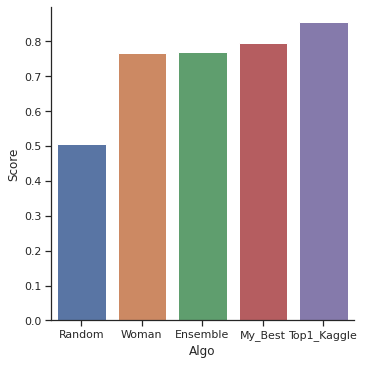

In [182]:
# DataFrame mit den Trainingsergebnissen
scores = pd.DataFrame(data = (["Random", score_random],
                              ["Woman", score_woman],
                              ["Ensemble", score_ensemble], 
                              ["My_Best", 0.79425],
                              ["Top1_Kaggle", 0.85645]),
                      columns = ["Algo", "Score"])

# Plotten der Ergebnisse
sns.catplot(x = "Algo", 
            y = "Score", 
            kind = "bar", 
            data = scores,
            ci = None)

[1] Crisp DM Vorgehensmodel https://www.bigdata-insider.de/was-ist-crisp-dm-a-815478/